## AFM basic usage on colab
[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/pycroscopy/DTMicroscope/blob/afm_ser/DTMicroscope/notebooks/1_AFM_DT_basic_colab.ipynb)


In [1]:
!pip install pyro5
!pip install scifireaders
!pip install sidpy
!pip install pynsid
!pip install git+https://github.com/pycroscopy/DTMicroscope.git@afm_ser

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 3.8 MB/s eta 0:00:00
  Using cached jedi-0.19.1-py2.py3-none-any.whl.metadata (22 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.2/84.2 kB 775.3 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.4/102.4 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 47.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.8/44.8 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.9/69.9 kB 4.4 MB/s eta 0:00:00
Using cached jedi-0.19.1-py2.py3-none-any.whl (1.6 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 51.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 516.3/516.3 kB 29.1 MB/s eta 0:00:00
  Cloning https://github.com/pycroscopy/DTMicroscope.git (to revision afm_ser) to /tmp/pip-req-build-eowli8ri
  Running command git clone --filter=blob:none --quiet https://github.com/pycroscopy/DTMicroscope.git /tmp/pip-req-build-eowli8ri
  Running c

In [1]:
!run_server

You don't have gwyfile installed.     If you wish to open .gwy files, you will need to      install it (pip install gwyfile) before attempting.
Server started and running in the background. Logs are being written to server.log.


# Client side

In [2]:
import matplotlib.pylab as plt
import numpy as np
import Pyro5.api
from IPython.display import clear_output, display



## 1. Get data

In [14]:
!wget https://github.com/pycroscopy/DTMicroscope/raw/boris_dev/DTMicroscope/test/datasets/dset_spm1.h5


--2024-10-11 21:42:54--  https://github.com/pycroscopy/DTMicroscope/raw/boris_dev/DTMicroscope/test/datasets/dset_spm1.h5
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/pycroscopy/DTMicroscope/boris_dev/DTMicroscope/test/datasets/dset_spm1.h5 [following]
--2024-10-11 21:42:54--  https://raw.githubusercontent.com/pycroscopy/DTMicroscope/boris_dev/DTMicroscope/test/datasets/dset_spm1.h5
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 22317256 (21M) [application/octet-stream]
Saving to: ‘dset_spm1.h5’

dset_spm1.h5        100%[===================>]  21.28M  6.10MB/s    in 4.0s    

2024-10-11 21:4

## 2. Register data to the DigitalTwin

In [3]:
uri = "PYRO:microscope.server@localhost:9091"
mic_server = Pyro5.api.Proxy(uri)
import sys

if 'google.colab' in sys.modules:
    mic_server.initialize_microscope("AFM", data_path = r"dset_spm1.h5")
else:
    mic_server.initialize_microscope("AFM", data_path = "../test/datasets/dset_spm1.h5")
mic_server.setup_microscope(data_source = 'Compound_Dataset_1')#upload dataset?
mic_server.get_dataset_info()

[('channels',
  ['spectral_dataset_0',
   'image_dataset_0',
   'image_dataset_1',
   'image_dataset_2',
   'image_dataset_3',
   'image_dataset_4',
   'image_dataset_5']),
 ('signals',
  ['Response',
   'HeightRetrace',
   'Amplitude1Retrace',
   'Amplitude2Retrace',
   'Phase1Retrace',
   'Phase2Retrace',
   'FrequencyRetrace']),
 ('units', ['a.u.', 'm', 'm', 'm', 'deg', 'deg', 'm']),
 ('scans', [0, 1, 2, 3, 4, 5]),
 ('spectra', []),
 ('point_clouds', [0])]

## 3. Get scan data

In [4]:
array_list, shape, dtype = mic_server.get_scan(channels=['HeightRetrace','image_dataset_1'])
dat = np.array(array_list, dtype=dtype).reshape(shape)


Text(0.5, 1.0, 'image_dataset_1')

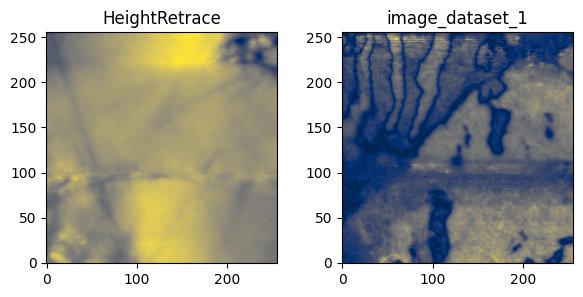

In [5]:
fig, ax = plt.subplots(1, 2, figsize=(7,3))

ax[0].imshow(dat[0].T, cmap='cividis', origin='lower')
ax[0].set_title('HeightRetrace')
ax[1].imshow(dat[1].T, cmap='cividis', origin='lower')
ax[1].set_title('image_dataset_1')

In [21]:
print(f'Current location: {mic_server.x, mic_server.y}')

Current location: (9.803921568627648e-09, 9.803921568627648e-09)


## 4. Scanning emulator

In [22]:
gen = mic_server.scanning_emulator(scanning_rate=5)
k = 0

print(f'Line {k}')
line = next(gen)
line = [np.array(l) for l in line]  # Convert list back to numpy array
fig, ax = plt.subplots(1, len(line), figsize=(8,1.5))
for i, ax_ in enumerate(ax):
    ax_.plot(np.arange(len(line[i])), line[i])
    ax_.set_xticks([])
    ax_.set_yticks([])
plt.ion()  # Enable interactive mode
plt.show()
k += 1

while True:
    line = next(gen)
    line = [np.array(l) for l in line]  # Convert list back to numpy array
    for i, ax_ in enumerate(ax):
        ax_.lines[0].set_data(np.arange(len(line[i])), line[i])

    clear_output(wait=True)
    print(f'Line {k}')
    display(fig)

    k += 1


Line 4


KeyboardInterrupt: 

## 5. Get individual line

In [25]:
array_list, shape, dtype  = mic_server.scan_individual_line('vertical', coord = -1e-6, channels=['Amplitude1Retrace', 'Phase1Retrace'])
line = np.array(array_list, dtype=dtype).reshape(shape)

Text(0.5, 1.0, 'Channel_002')

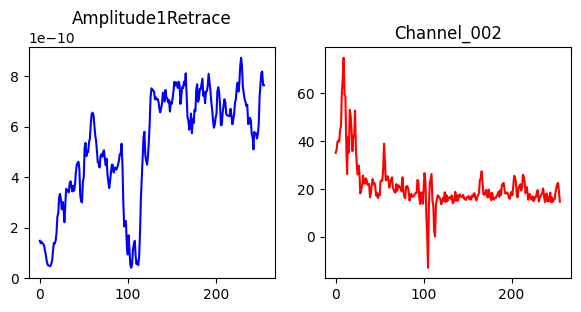

In [26]:
fig, ax = plt.subplots(1, 2, figsize=(7,3))

ax[0].plot(line[0].T, color='b')
ax[0].set_title('Amplitude1Retrace')
ax[1].plot(line[1].T, color='r')
ax[1].set_title('Channel_002')

In [ ]:
#print current probe position
print(f'Current location: {mic_server.x, mic_server.y}')

## 6. Scan arbitrary path

In [27]:
corners = np.array([[-2e-6,2e-6],[1e-6,1.8e-6],[2.1e-6,2e-6]]) #real coordinates
array_list, shape, dtype  = mic_server.get_scan(channels=['Amplitude1Retrace',])
dat = np.array(array_list, dtype=dtype).reshape(shape)

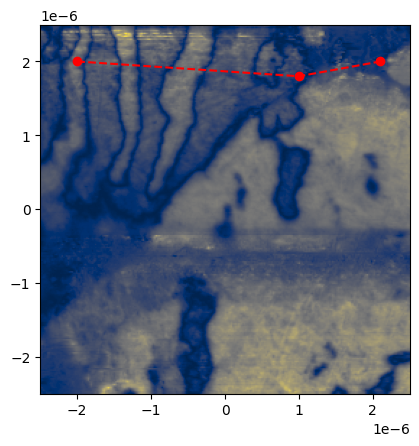

In [28]:
plt.imshow(dat[0].T, origin='lower', extent=(mic_server.x_min, mic_server.x_max, mic_server.y_min, mic_server.y_max), cmap='cividis')
plt.scatter(corners[:,0], corners[:,1], color='red')
plt.plot(*corners.T, '--', color='red')

In [30]:
#print current probe position
print(f'Current location: {mic_server.x, mic_server.y}')

Current location: (-1e-06, 2.5e-06)


## 6. Get spectral data

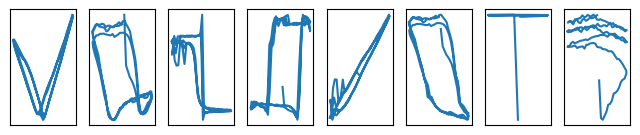

In [32]:
(array_list_spec, shape_spec, dtype_spec), (array_list_y, shape_y, dtype_y) = mic_server.get_spectrum()
_spec_dim = np.array(array_list_spec, dtype=dtype_spec).reshape(shape_spec)
_y = np.array(array_list_y, dtype=dtype_y).reshape(shape_y)
res = (_spec_dim, _y)
fig, ax = plt.subplots(1, len(res[1]), figsize=(8, 1.5))
for i in range(len(res[1])):
    ax[i].plot(res[0], res[1][i])
    ax[i].set_xticks([])
    ax[i].set_yticks([])

## 7. Corrupted scans

### 7.1 Real_tip(blunt tip)

In [6]:
kwargs = {'r_tip': 0.5, 'center': [0.5, 0.5]}# make sure center is list and not array 

array_list, shape, dtype  =  mic_server.get_scan(channels=['HeightRetrace',], mod_string=None, mod_kwargs = None)
dat =  np.array(array_list, dtype=dtype).reshape(shape)
array_list, shape, dtype  =  mic_server.get_scan(channels=['HeightRetrace',], mod_string = "real_tip", mod_kwargs = kwargs)
dat0 =  np.array(array_list, dtype=dtype).reshape(shape)
dat0.shape

(1, 256, 256)

Text(0.5, 1.0, 'Blunt tip')

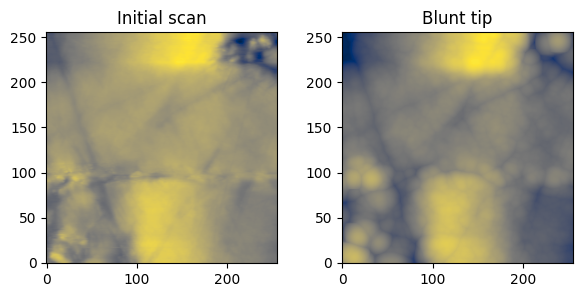

In [7]:
fig, ax = plt.subplots(1, 2, figsize=(7,3))

ax[0].imshow(dat[0].T, cmap='cividis', origin='lower')
ax[0].set_title('Initial scan')
ax[1].imshow(dat0[0].T, cmap='cividis', origin='lower')
ax[1].set_title('Blunt tip')

In [9]:
#get individual line
kwargs = {'r_tip': 0.5, 'center': [0.5, 0.5]}

# mod_dict = [{'effect': "", 'kwargs': kwargs},]

array_list, shape, dtype =  mic_server.scan_individual_line('vertical', channels=['Amplitude1Retrace'], coord = -1e-6, mod_string = None, mod_kwargs = None)
line = np.array(array_list, dtype=dtype).reshape(shape)
array_list, shape, dtype =  mic_server.scan_individual_line('vertical', channels=['Amplitude1Retrace'],coord = -1e-6, mod_string = None, mod_kwargs = kwargs)
line1 = np.array(array_list, dtype=dtype).reshape(shape)
line1.shape

(1, 256)

Text(0.5, 1.0, 'Tip doubling')

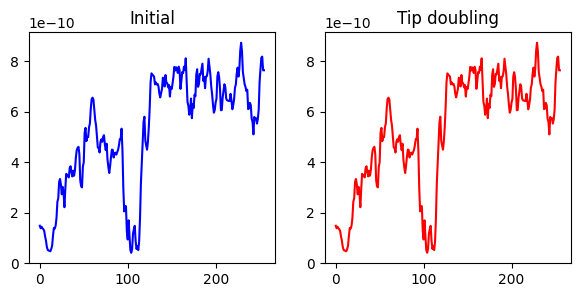

In [10]:
fig, ax = plt.subplots(1, 2, figsize=(7,3))

ax[0].plot(line[0], color='b')
ax[0].set_title('Initial')
ax[1].plot(line1[0], color='r')
ax[1].set_title('Tip doubling')

### 7.3 Non-perfect PI coefficients

In [19]:
kwargs_low_I = {'I': 2, 'dz':10e-9, 'sample_rate': 2000}
kwargs_high_I = {'I': 30, 'dz':10e-9, 'sample_rate': 2000}
kwargs_normal_I = {'I': 10, 'dz':10e-9, 'sample_rate': 2000}


In [20]:
dat =  mic_server.get_scan(channels=['HeightRetrace',], mod_string = None, mod_kwargs = None)
array_list, shape, dtype =  mic_server.get_scan(channels=['HeightRetrace',], mod_string = "real_PID", mod_kwargs = kwargs_normal_I)
dat_norm = np.array(array_list, dtype=dtype).reshape(shape)

array_list, shape, dtype  =  mic_server.get_scan(channels=['HeightRetrace',], mod_string = "real_PID", mod_kwargs = kwargs_low_I)
dat_low = np.array(array_list, dtype=dtype).reshape(shape)

array_list, shape, dtype  =  mic_server.get_scan(channels=['HeightRetrace',], mod_string = "real_PID", mod_kwargs = kwargs_high_I)
dat_high = np.array(array_list, dtype=dtype).reshape(shape)

## 28 seconds without server and 29 sec with server